In [35]:
import matplotlib.pyplot as plt
import json

In [36]:
%matplotlib inline

In [37]:
def plot_jsons(json_dir,image_dir,names,titles,height,width,figsize=(10,20)):
    pic_num = len(names)//(height*width)
    for p in range(pic_num):
        fig, axes = plt.subplots(height, width, sharey=True, figsize=figsize, squeeze=False)
        fig.patch.set_alpha(1)
        
        for h in range(height):
            for w in range(width):
                plt_local_num = h * width + w
                name_idx = p * height * width + plt_local_num
                if(name_idx>=len(names)):
                    continue
                name = names[name_idx]
                title = titles[name_idx]
                json_path = json_dir + './' + name

                with open(json_path) as f:
                    dat = json.load(f)
                train_loss = dat['train']
                dev_loss = dat['dev']

                x_lim = len(train_loss)
                x_per5 = [ 5*i for i in range(1,len(dev_loss)+1)]

                ax = axes[h, w]
                ax.plot(range(1,x_lim+1),train_loss)
                ax.plot(x_per5,dev_loss)
                ax.legend(['train','dev'])
                ax.set_title(title)
                ax.grid(True,axis='y')

        image_path = image_dir + './image_{0}'.format(p)
        fig.savefig(image_path)

In [38]:
def plot_jsons_coef(json_dir,image_dir,names,titles,height,width,figsize=(10,20)):
    pic_num = len(names)//(height*width)
    for p in range(pic_num):
        fig, axes = plt.subplots(height, width, sharey=True, figsize=figsize, squeeze=False)
        fig.patch.set_alpha(1)
        
        for h in range(height):
            for w in range(width):
                plt_local_num = h * width + w
                name_idx = p * height * width + plt_local_num
                if(name_idx>=len(names)):
                    continue
                name = names[name_idx]
                title = titles[name_idx]
                json_path = json_dir + './' + name

                with open(json_path) as f:
                    dat = json.load(f)
                train_loss = dat['train']
                dev_loss = dat['dev']
                coef = dat['coef']

                x_lim = len(train_loss)
                x_per5 = [ 5*i for i in range(1,len(dev_loss)+1)]

                ax = axes[h, w]
                ax.plot(range(1,x_lim+1),train_loss)
                ax.plot(x_per5,dev_loss)
                
                ax2 = ax.twinx()
                ax2.plot(x_per5,coef,color='green')
                ax2.legend(['coef'])
                
                ax.legend(['train','dev'])
                ax.set_title(title)
                ax.grid(True,axis='y')

        image_path = image_dir + './image_{0}'.format(p)
        fig.savefig(image_path)

In [62]:
def plot_jsons_for_cross_valid(json_dir,image_dir,names,titles,height,width,print_coef=True,figsize=(10,20)):
    pic_num = len(names)//(height*width)
    for p in range(pic_num):
        fig, axes = plt.subplots(height, width, sharey=True, figsize=figsize, squeeze=False)
        fig.patch.set_alpha(1)
        
        for h in range(height):
            for w in range(width):
                plt_local_num = h * width + w
                name_idx = p * height * width + plt_local_num
                if(name_idx>=len(names)):
                    continue
                name = names[name_idx]
                title = titles[name_idx]
                json_path = json_dir + './' + name

                with open(json_path) as f:
                    dat = json.load(f)
                train_loss = dat['train']
                dev_loss = dat['dev']
                if print_coef:
                    coef = dat['coef']
                    
#                 print(len(train_loss),len(dev_loss),len(coef))

                x_lim = len(train_loss)

                ax = axes[h, w]
                ax.plot(range(1,x_lim+1),train_loss)
                ax.plot(range(1,x_lim+1),dev_loss)
#                 ax.set_ylim(0.12,0.15)
                
                if print_coef:
                    ax2 = ax.twinx()
                    ax2.plot(range(1,x_lim+1),coef,color='green')
                    ax2.legend(['coef'],loc='upper right')
                    ax2.set_ylim(0.1,0.7)
                
                ax.legend(['train','dev'],loc='upper left')
                ax.set_title(title)
                ax.grid(True,axis='y')

        image_path = image_dir + './image_{0}'.format(p)
        fig.savefig(image_path)

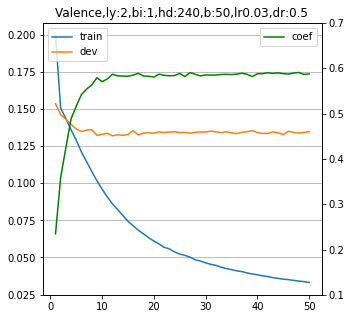

In [63]:
# Valence 確定版
vad_types = ['Valence']

json_dir = './dat_model_json/best/'
image_dir = './dat_model_json/best/'

bss = [50]
# lrs = [0.2,0.4]
lrs = [0.03]

hidden_dims = [240]
num_layers = [2]
bis = [1]
drs = [0.5]

names = []
titles = []

for vad_type in vad_types:
    for bi in bis:
        for num_layer in num_layers:
            for hidden_dim in hidden_dims:
                for bs in bss:
                    for lr in lrs:
                        for dr in drs:
                            name = "{}_layer_{}_bi_{}_hd_{}_bs_{}_lr_{}_dr_{}_Adagrad.json".format(\
                                    vad_type,num_layer,bi,hidden_dim,bs,lr,dr)
                            title = "{},ly:{},bi:{},hd:{},b:{},lr{},dr:{}".format(\
                                    vad_type,num_layer,bi,hidden_dim,bs,lr,dr)
                            names.append(name)
                            titles.append(title)

plot_jsons_for_cross_valid(json_dir,image_dir,names,titles,len(lrs),len(drs),figsize=(5,5),print_coef=True)


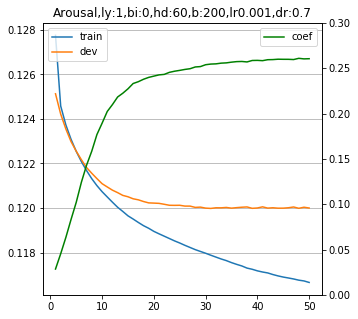

In [61]:
vad_types = ['Arousal']

json_dir = './dat_model_json/valid/json/'
image_dir = './image/'

bss = [200]
# lrs = [0.2,0.4]
lrs = [0.001]

hidden_dims = [60]
num_layers = [1]
bis = [0]
drs = [0.7]

names = []
titles = []

for vad_type in vad_types:
    for bi in bis:
        for num_layer in num_layers:
            for hidden_dim in hidden_dims:
                for bs in bss:
                    for lr in lrs:
                        for dr in drs:
                            name = "{}_layer_{}_bi_{}_hd_{}_bs_{}_lr_{}_dr_{}_Adagrad.json".format(\
                                    vad_type,num_layer,bi,hidden_dim,bs,lr,dr)
                            title = "{},ly:{},bi:{},hd:{},b:{},lr{},dr:{}".format(\
                                    vad_type,num_layer,bi,hidden_dim,bs,lr,dr)
                            names.append(name)
                            titles.append(title)

plot_jsons_for_cross_valid(json_dir,image_dir,names,titles,len(lrs),len(drs),figsize=(len(drs)*5,len(lrs)*5),print_coef=True)


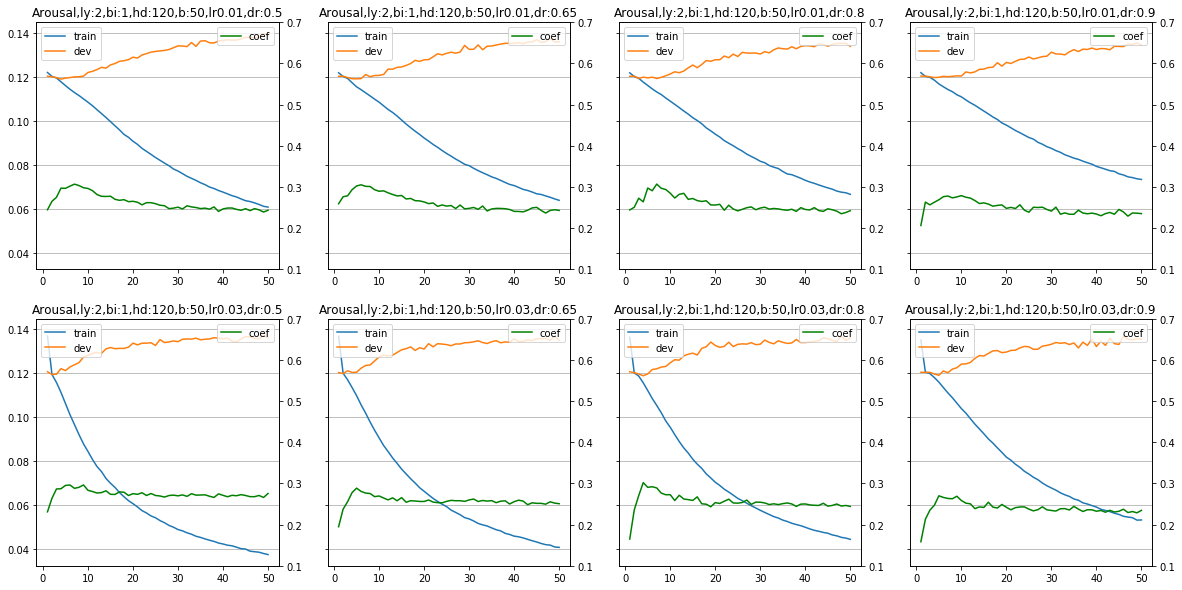

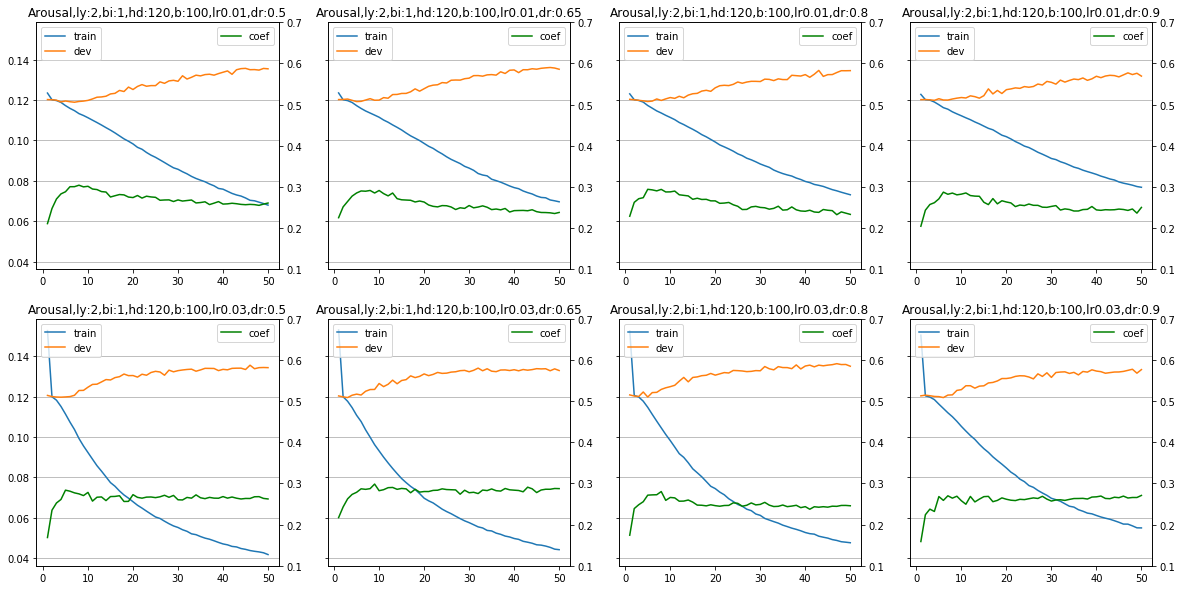

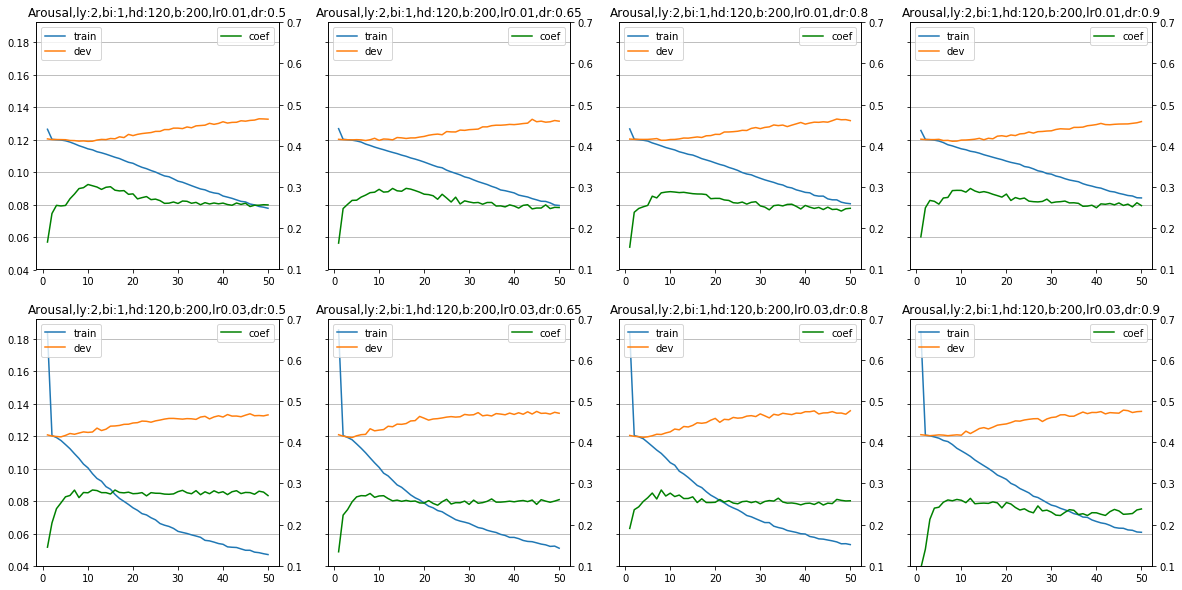

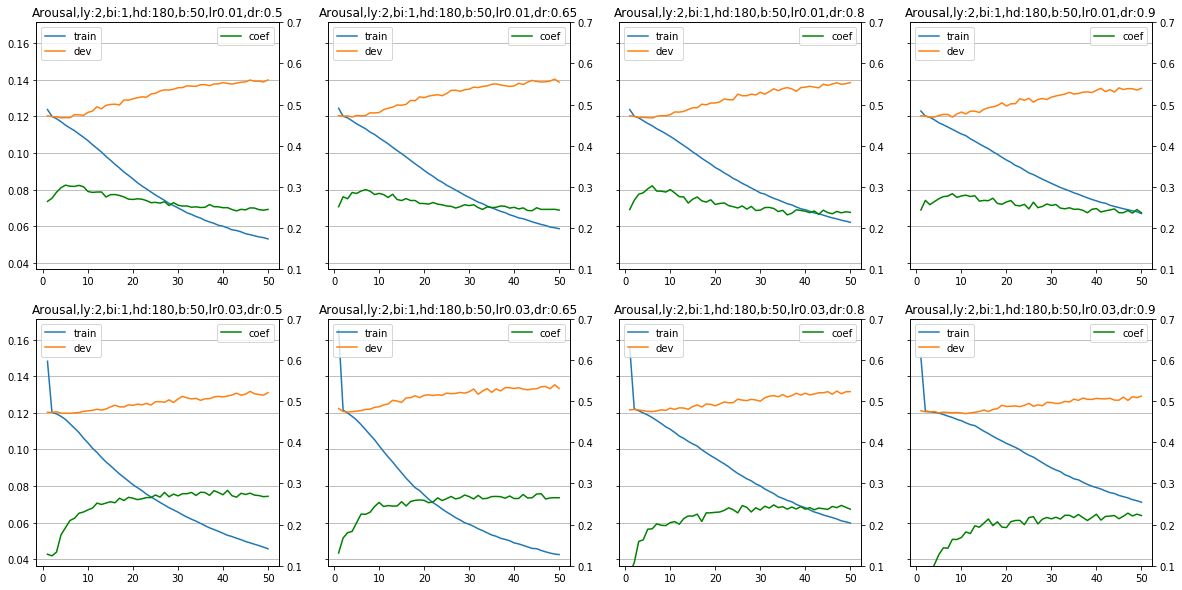

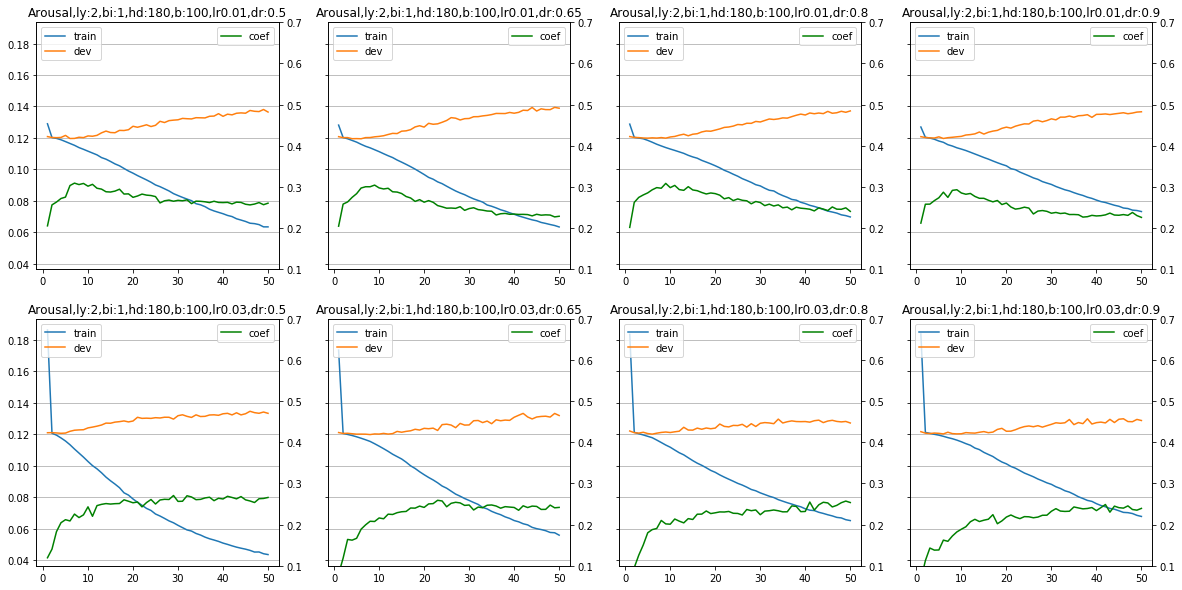

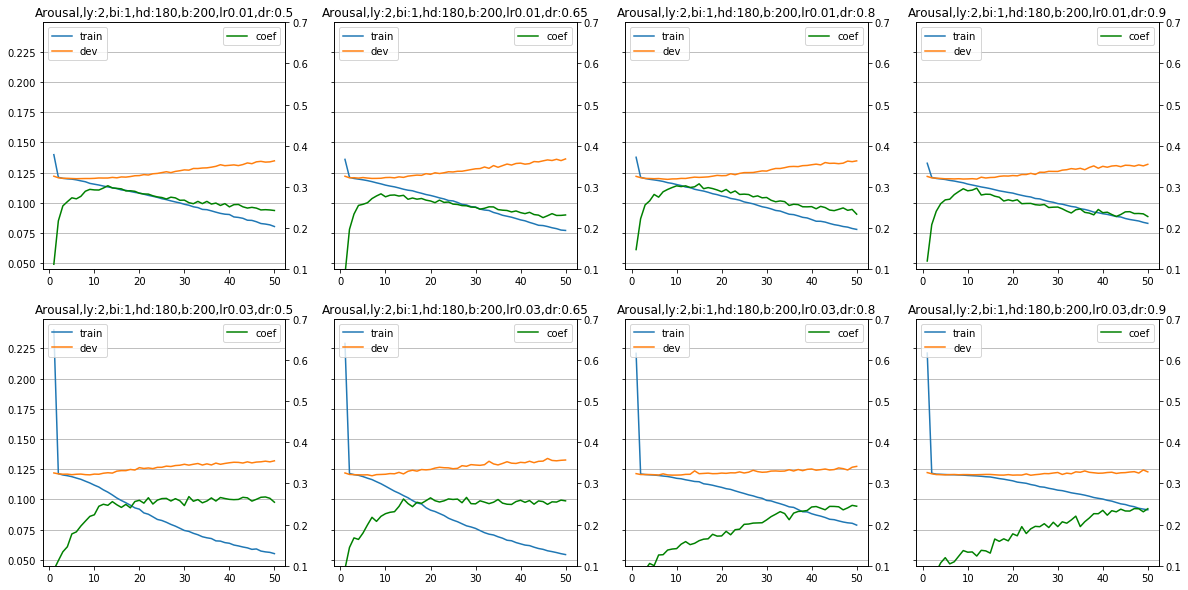

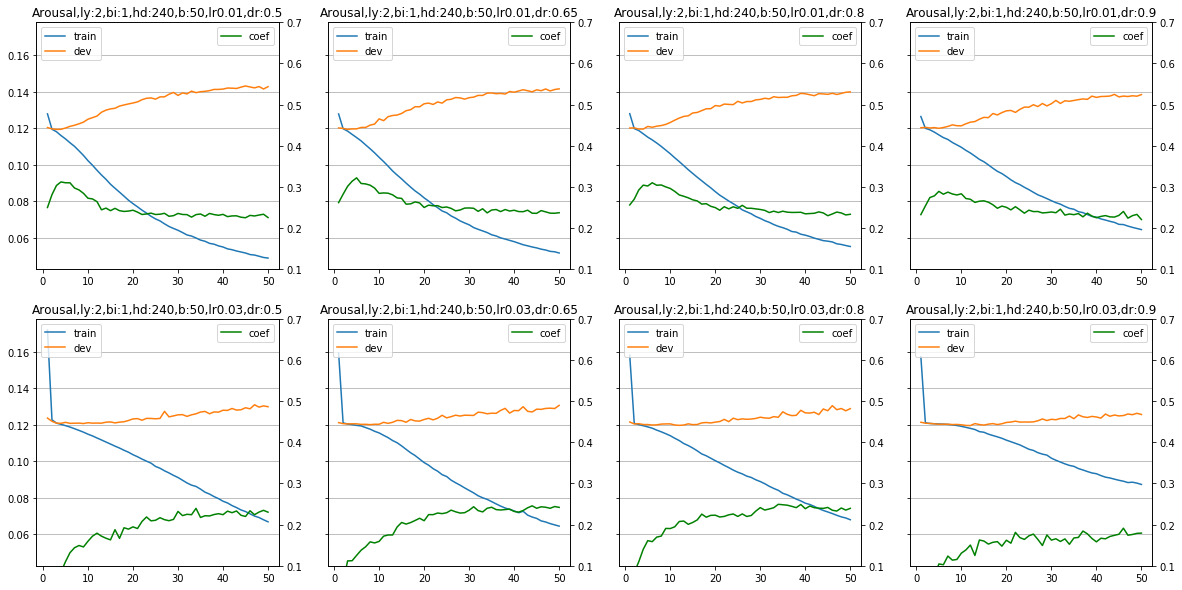

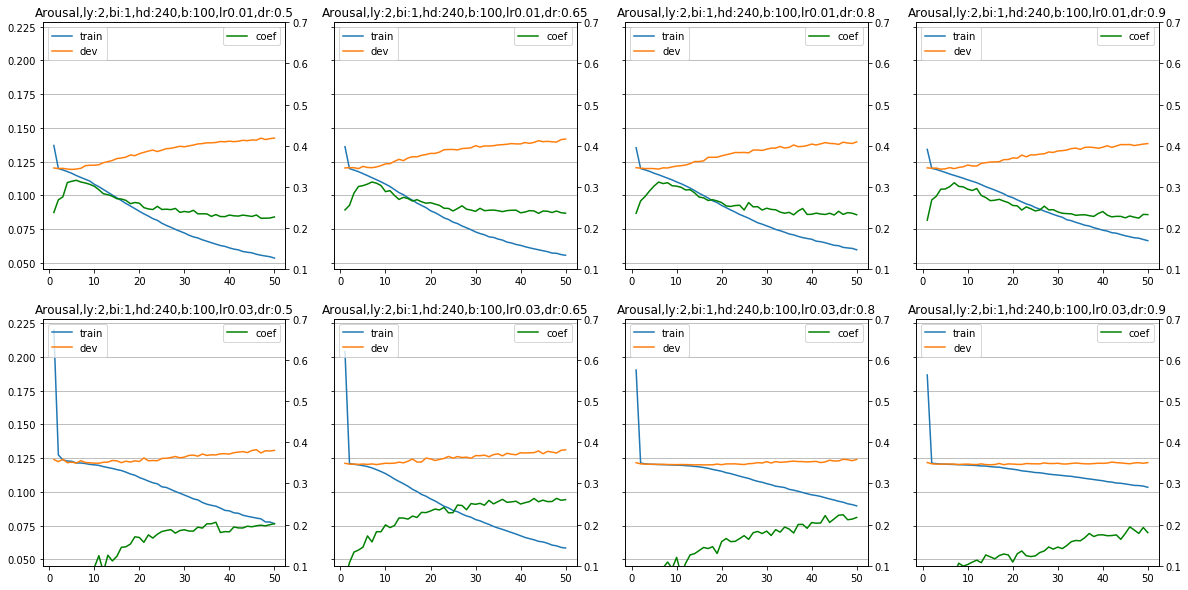

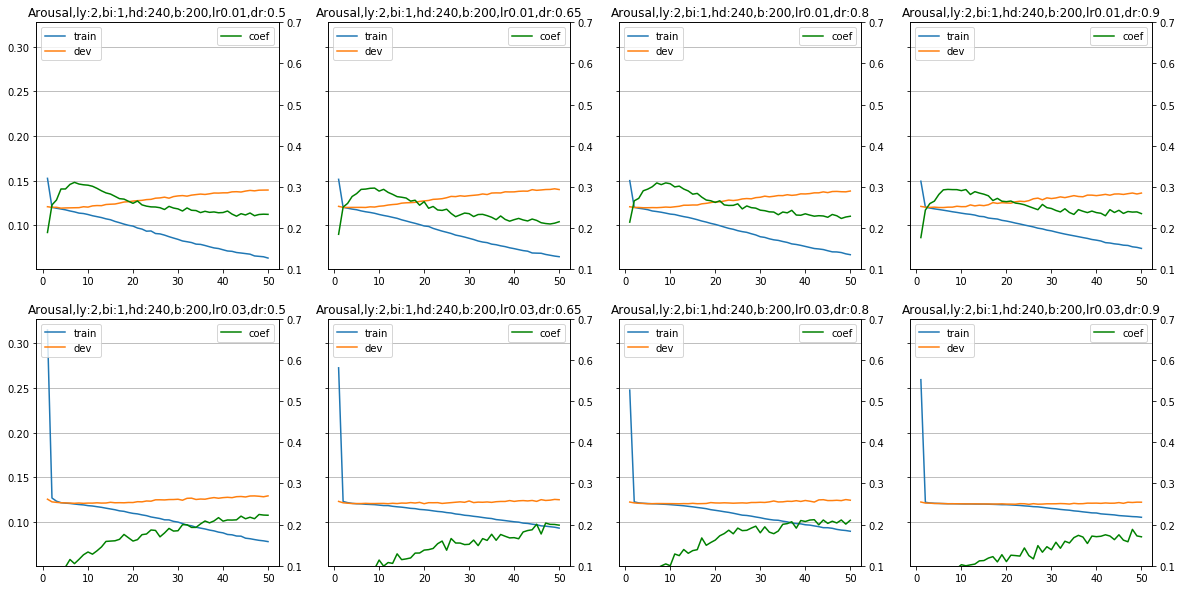

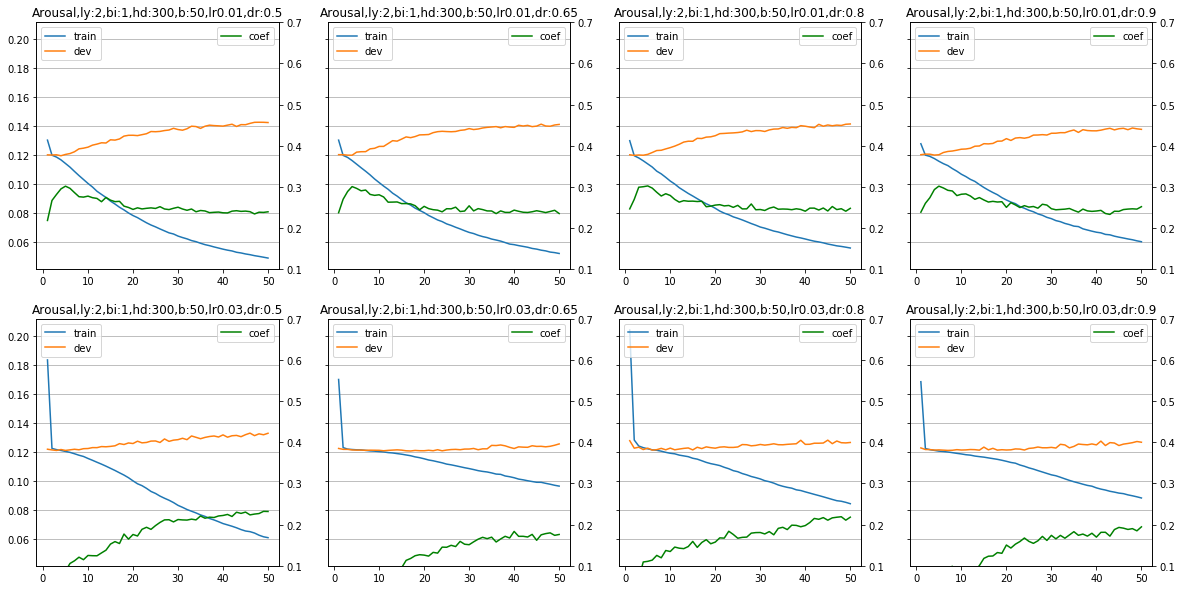

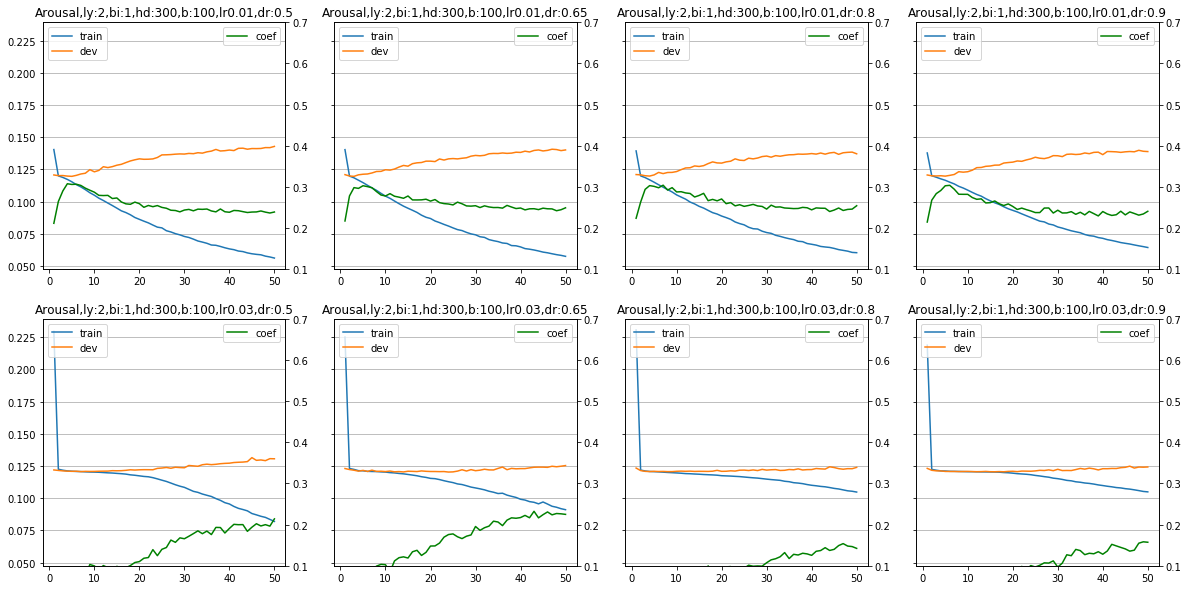

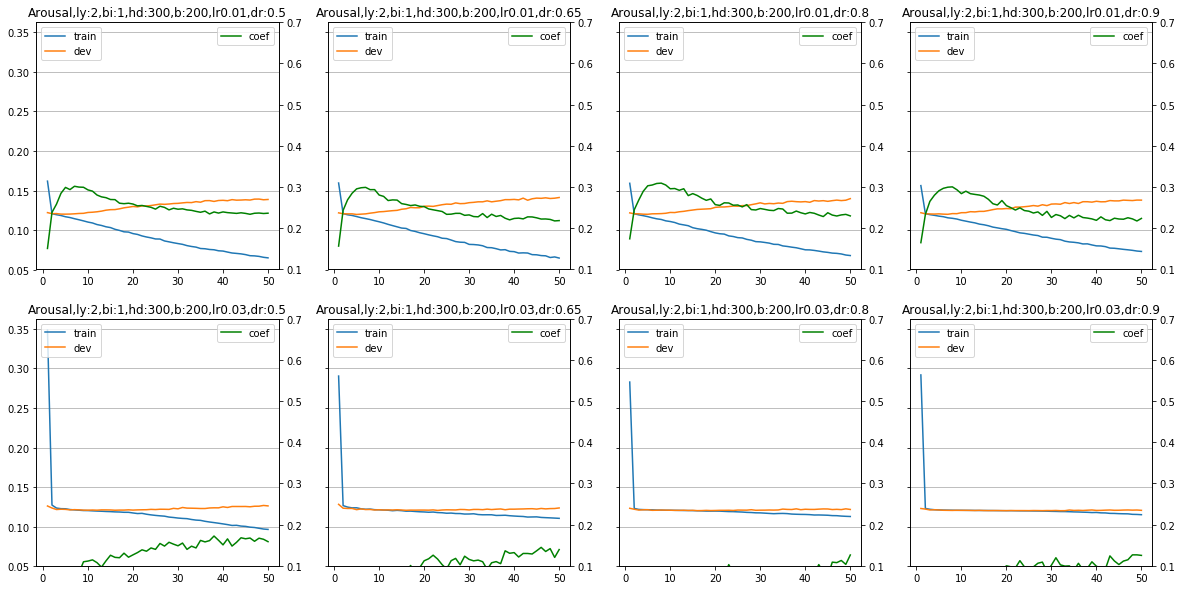

In [57]:
vad_types = ['Arousal']

json_dir = './dat_model_json/valid/json/'
image_dir = './image/'

bss = [50,100,200]
# lrs = [0.2,0.4]
lrs = [0.01,0.03]

hidden_dims = [120,180,240,300]
num_layers = [2]
bis = [1]
drs = [0.5,0.65,0.8,0.9]

names = []
titles = []

for vad_type in vad_types:
    for bi in bis:
        for num_layer in num_layers:
            for hidden_dim in hidden_dims:
                for bs in bss:
                    for lr in lrs:
                        for dr in drs:
                            name = "{}_layer_{}_bi_{}_hd_{}_bs_{}_lr_{}_dr_{}_Adagrad.json".format(\
                                    vad_type,num_layer,bi,hidden_dim,bs,lr,dr)
                            title = "{},ly:{},bi:{},hd:{},b:{},lr{},dr:{}".format(\
                                    vad_type,num_layer,bi,hidden_dim,bs,lr,dr)
                            names.append(name)
                            titles.append(title)

plot_jsons_for_cross_valid(json_dir,image_dir,names,titles,len(lrs),len(drs),figsize=(len(drs)*5,len(lrs)*5),print_coef=True)
